# YOUR PROJECT TITLE

> **Note the following:** 
> 1. This is *not* meant to be an example of an actual **model analysis project**, just an example of how to structure such a project.
> 1. Remember the general advice on structuring and commenting your code
> 1. The `modelproject.py` file includes a function which could be used multiple times in this notebook.

Imports and set magics:

In [1]:
import numpy as np
from scipy import optimize
import sympy as sm

# autoreload modules when code is run
%load_ext autoreload
%autoreload 2

# local modules
import modelproject

# Model description

**Write out the model in equations here.** 

Make sure you explain well the purpose of the model and comment so that other students who may not have seen it before can follow.  

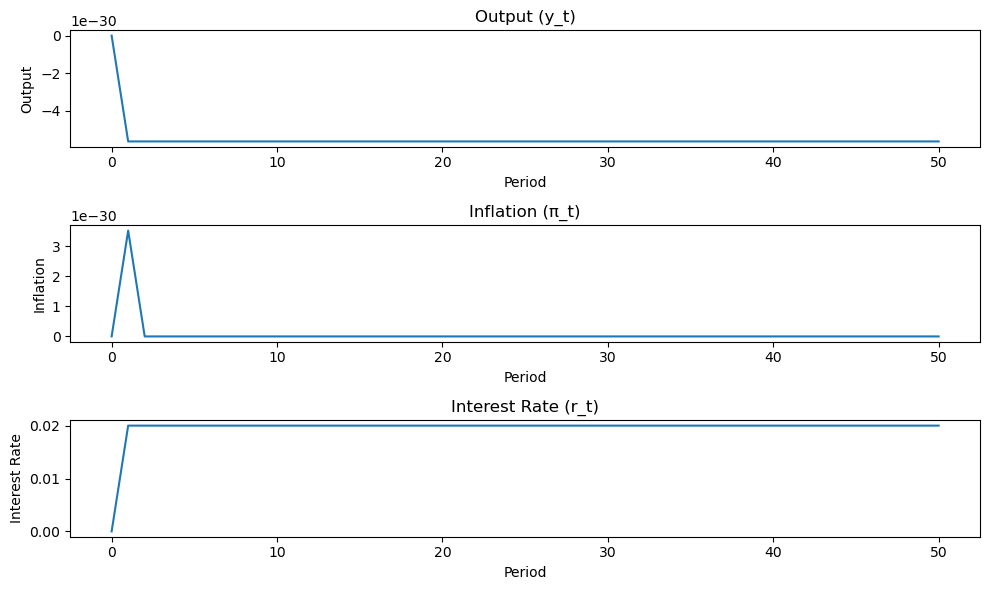

In [10]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.optimize import fsolve

# Define the model equations
# IS curve
def y_t(Exp_y_t1, sigma, Exp_r_t, rho):
    return Exp_y_t1 - (1/sigma)*(Exp_r_t-rho)

# Phillips curve
def pi_t(kappa, y_t, beta, Exp_pi_t1):
    return kappa*y_t + beta* Exp_pi_t1

# Taylor rule
def r_t(rho, phi_y, phi_pi, Exp_y_t1, Exp_pi_t1):
    return rho + phi_y * Exp_y_t1 + phi_pi * Exp_pi_t1

# Solve the model equations
def solve_model(Exp_y_t1, Exp_r_t, Exp_pi_t1, sigma, rho, kappa, beta, phi_y, phi_pi):
    # Define a function to solve using fsolve
    def equations(vars):
        yt, pi_t1, rt1 = vars
        eq1 = y_t(Exp_y_t1, sigma, rt1, rho) - yt
        eq2 = pi_t(kappa, yt, beta, Exp_pi_t1) - pi_t1
        eq3 = r_t(rho, phi_y, phi_pi, Exp_y_t1, Exp_pi_t1) - rt1
        return [eq1, eq2, eq3]
    
    # Initial guess
    guess = [0, 0, 0]
    
    # Solve using fsolve
    yt, pi_t1, rt1 = fsolve(equations, guess)
    
    return yt, pi_t1, rt1

# Simulation
def simulate_model(Exp_y_t1, Exp_r_t, Exp_pi_t1, sigma, rho, kappa, beta, phi_y, phi_pi, periods):
    y_t_values = [0]  # Initial output assumed to be 0
    pi_t_values = [0]  # Initial inflation assumed to be 0
    r_t_values = [0]  # Initial interest rate assumed to be 0
    for _ in range(periods):
        yt, pi_t1, rt1 = solve_model(Exp_y_t1, Exp_r_t, Exp_pi_t1, sigma, rho, kappa, beta, phi_y, phi_pi)
        y_t_values.append(yt)
        pi_t_values.append(pi_t1)
        r_t_values.append(rt1)
        # Update expected values for the next period
        Exp_y_t1, Exp_r_t, Exp_pi_t1 = yt, rt1, pi_t1
    return y_t_values, pi_t_values, r_t_values

# Parameter values
Exp_y_t1 = 0
Exp_r_t = 0.02
Exp_pi_t1 = 0
sigma = 1
rho = 0.02
kappa = 0.5
beta = 0.5
phi_y = 0.5
phi_pi = 1
periods = 50

# Simulate
y_t_values, pi_t_values, r_t_values = simulate_model(Exp_y_t1, Exp_r_t, Exp_pi_t1, sigma, rho, kappa, beta, phi_y, phi_pi, periods)

# Plotting
plt.figure(figsize=(10, 6))

plt.subplot(3, 1, 1)
plt.plot(y_t_values)
plt.title('Output (y_t)')
plt.xlabel('Period')
plt.ylabel('Output')

plt.subplot(3, 1, 2)
plt.plot(pi_t_values)
plt.title('Inflation (π_t)')
plt.xlabel('Period')
plt.ylabel('Inflation')

plt.subplot(3, 1, 3)
plt.plot(r_t_values)
plt.title('Interest Rate (r_t)')
plt.xlabel('Period')
plt.ylabel('Interest Rate')

plt.tight_layout()
plt.show()


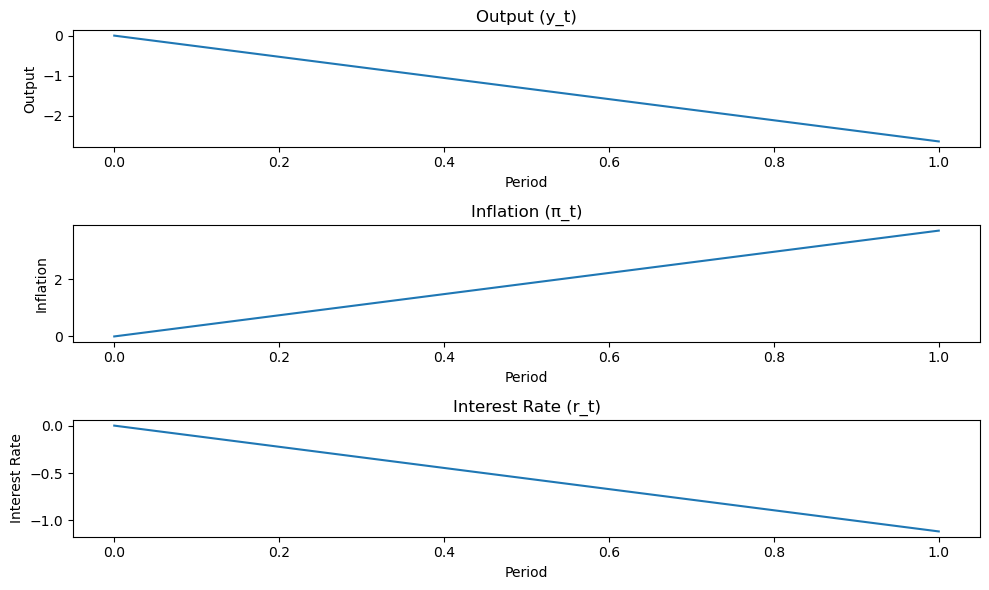

In [16]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.optimize import fsolve

# Define the model equations
# IS curve
def y_t(Exp_y_t1, sigma, Exp_r_t, rho):
    return Exp_y_t1 - (1/sigma)*(Exp_r_t-rho)

# Phillips curve
def pi_t(kappa, y_t, beta, Exp_pi_t1):
    return kappa*y_t + beta* Exp_pi_t1

# Taylor rule
def r_t(rho, phi_y, phi_pi, Exp_y_t1, Exp_pi_t1):
    return rho + phi_y * Exp_y_t1 + phi_pi * Exp_pi_t1

# Solve the model equations
def solve_model(Exp_y_t1, Exp_r_t, Exp_pi_t1, sigma, rho, kappa, beta, phi_y, phi_pi):
    # Define a function to solve using fsolve
    def equations(vars):
        yt, pi_t1, rt1 = vars
        eq1 = y_t(Exp_y_t1, sigma, rt1, rho) - yt
        eq2 = pi_t(kappa, yt, beta, Exp_pi_t1) - pi_t1
        eq3 = r_t(rho, phi_y, phi_pi, Exp_y_t1, Exp_pi_t1) - rt1
        return [eq1, eq2, eq3]
    
    # Initial guess
    guess = [0, 0, 0]
    
    # Solve using fsolve
    yt, pi_t1, rt1 = fsolve(equations, guess)
    
    return yt, pi_t1, rt1

# Simulation
def simulate_model(sigma, rho, kappa, beta, phi_y, phi_pi, periods):
    y_t_values = [0]  # Initial output assumed to be 0
    pi_t_values = [0]  # Initial inflation assumed to be 0
    r_t_values = [0]  # Initial interest rate assumed to be 0
    for _ in range(periods):
        # Randomize parameters
        Exp_y_t1 = np.random.normal(loc=0, scale=1)
        Exp_r_t = np.random.normal(loc=0, scale=1)
        Exp_pi_t1 = np.random.normal(loc=0, scale=1)
        sigma = np.random.normal(loc=0, scale=1)
        rho = np.random.normal(loc=0, scale=1)
        kappa = np.random.normal(loc=0, scale=1)
        beta = np.random.normal(loc=0, scale=1)
        phi_y = np.random.normal(loc=0, scale=1)
        phi_pi = np.random.normal(loc=0, scale=1)
        
        yt, pi_t1, rt1 = solve_model(Exp_y_t1, Exp_r_t, Exp_pi_t1, sigma, rho, kappa, beta, phi_y, phi_pi)
        y_t_values.append(yt)
        pi_t_values.append(pi_t1)
        r_t_values.append(rt1)
    return y_t_values, pi_t_values, r_t_values

# Parameter values
periods = 50

# Simulate
y_t_values, pi_t_values, r_t_values = simulate_model(periods, sigma, rho, kappa, beta, phi_y, phi_pi)

# Plotting
plt.figure(figsize=(10, 6))

plt.subplot(3, 1, 1)
plt.plot(y_t_values)
plt.title('Output (y_t)')
plt.xlabel('Period')
plt.ylabel('Output')

plt.subplot(3, 1, 2)
plt.plot(pi_t_values)
plt.title('Inflation (π_t)')
plt.xlabel('Period')
plt.ylabel('Inflation')

plt.subplot(3, 1, 3)
plt.plot(r_t_values)
plt.title('Interest Rate (r_t)')
plt.xlabel('Period')
plt.ylabel('Interest Rate')

plt.tight_layout()
plt.show()


In [20]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.optimize import fsolve
from ipywidgets import interact, FloatSlider

# Define the model equations
# IS curve
def y_t(Exp_y_t1, sigma, Exp_r_t, rho):
    return Exp_y_t1 - (1/sigma)*(Exp_r_t-rho)

# Phillips curve
def pi_t(kappa, y_t, beta, Exp_pi_t1):
    return kappa*y_t + beta* Exp_pi_t1

# Taylor rule
def r_t(rho, phi_y, phi_pi, Exp_y_t1, Exp_pi_t1):
    return rho + phi_y * Exp_y_t1 + phi_pi * Exp_pi_t1

# Solve the model equations
def solve_model(Exp_y_t1, Exp_r_t, Exp_pi_t1, sigma, rho, kappa, beta, phi_y, phi_pi):
    # Define a function to solve using fsolve
    def equations(vars):
        yt, pi_t1, rt1 = vars
        eq1 = y_t(Exp_y_t1, sigma, rt1, rho) - yt
        eq2 = pi_t(kappa, yt, beta, Exp_pi_t1) - pi_t1
        eq3 = r_t(rho, phi_y, phi_pi, Exp_y_t1, Exp_pi_t1) - rt1
        return [eq1, eq2, eq3]
    
    # Initial guess
    guess = [0, 0, 0]
    
    # Solve using fsolve
    yt, pi_t1, rt1 = fsolve(equations, guess)
    
    return yt, pi_t1, rt1

# Simulation
def simulate_model(periods, Exp_y_t1, Exp_r_t, Exp_pi_t1, sigma, rho, kappa, beta, phi_y, phi_pi):
    y_t_values = [0]  # Initial output assumed to be 0
    pi_t_values = [0]  # Initial inflation assumed to be 0
    r_t_values = [0]  # Initial interest rate assumed to be 0
    for _ in range(int(periods)):  # Convert periods to integer
        yt, pi_t1, rt1 = solve_model(Exp_y_t1, Exp_r_t, Exp_pi_t1, sigma, rho, kappa, beta, phi_y, phi_pi)
        y_t_values.append(yt)
        pi_t_values.append(pi_t1)
        r_t_values.append(rt1)
        # Update expected values for the next period
        Exp_y_t1, Exp_r_t, Exp_pi_t1 = yt, rt1, pi_t1
    return y_t_values, pi_t_values, r_t_values

# Interactive plot function
def interactive_plot(periods, Exp_y_t1_val, Exp_r_t_val, Exp_pi_t1_val, sigma_val, rho_val, kappa_val, beta_val, phi_y_val, phi_pi_val):
    y_t_values, pi_t_values, r_t_values = simulate_model(periods, Exp_y_t1_val, Exp_r_t_val, Exp_pi_t1_val, sigma_val, rho_val, kappa_val, beta_val, phi_y_val, phi_pi_val)
    
    plt.figure(figsize=(10, 6))

    plt.subplot(3, 1, 1)
    plt.plot(y_t_values)
    plt.title('Output (y_t)')
    plt.xlabel('Period')
    plt.ylabel('Output')

    plt.subplot(3, 1, 2)
    plt.plot(pi_t_values)
    plt.title('Inflation (π_t)')
    plt.xlabel('Period')
    plt.ylabel('Inflation')

    plt.subplot(3, 1, 3)
    plt.plot(r_t_values)
    plt.title('Interest Rate (r_t)')
    plt.xlabel('Period')
    plt.ylabel('Interest Rate')

    plt.tight_layout()
    plt.show()

# Set up the interactive widget
interact(interactive_plot,
         periods=FloatSlider(min=1, max=100, step=1, value=50, description='Periods'),
         Exp_y_t1_val=FloatSlider(min=0, max=1, step=0.1, value=0.5, description='Exp_y_t1'),
         Exp_r_t_val=FloatSlider(min=0, max=1, step=0.1, value=0.5, description='Exp_r_t'),
         Exp_pi_t1_val=FloatSlider(min=0, max=1, step=0.1, value=0.5, description='Exp_pi_t1'),
         sigma_val=FloatSlider(min=0, max=1, step=0.1, value=0.5, description='sigma'),
         rho_val=FloatSlider(min=0, max=1, step=0.1, value=0.5, description='rho'),
         kappa_val=FloatSlider(min=0, max=1, step=0.1, value=0.5, description='kappa'),
         beta_val=FloatSlider(min=0, max=1, step=0.1, value=0.5, description='beta'),
         phi_y_val=FloatSlider(min=0, max=1, step=0.1, value=0.5, description='phi_y'),
         phi_pi_val=FloatSlider(min=0, max=1, step=0.1, value=0.5, description='phi_pi')
        );


interactive(children=(FloatSlider(value=50.0, description='Periods', min=1.0, step=1.0), FloatSlider(value=0.5…

## Analytical solution

If your model allows for an analytical solution, you should provide here.

You may use Sympy for this. Then you can characterize the solution as a function of a parameter of the model.

To characterize the solution, first derive a steady state equation as a function of a parameter using Sympy.solve and then turn it into a python function by Sympy.lambdify. See the lecture notes for details. 

## Numerical solution

You can always solve a model numerically. 

Define first the set of parameters you need. 

Then choose one of the optimization algorithms that we have gone through in the lectures based on what you think is most fitting for your model.

Are there any problems with convergence? Does the model converge for all starting values? Make a lot of testing to figure these things out. 

# Further analysis

Make detailed vizualizations of how your model changes with parameter values. 

Try to make an extension of the model. 

# Conclusion

Add concise conclusion. 